In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from arc import*
import matplotlib.ticker as ticker
# atom = Rubidium85()

In [2]:
df = df = pd.read_csv('updated_Data_till_T0_2-75_durga_oct17.csv')

In [3]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
0,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.0865,55,133,259.3814,2.0496
1,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1038,55,133,259.3814,2.0493
2,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1211,55,133,259.3814,2.0481
3,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1385,55,133,259.3814,2.0451
4,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1558,55,133,259.3814,2.0394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676156,12,3,3.5,13,1,1.5,14,2,2.5,1.0000,0.9519,11,23,75306.6725,4.9398
4676157,12,3,3.5,13,1,1.5,14,2,2.5,1.0000,0.9692,11,23,75306.6725,4.9395
4676158,12,3,3.5,13,1,1.5,14,2,2.5,1.0000,0.9865,11,23,75306.6725,4.9392
4676159,12,3,3.5,13,1,1.5,14,2,2.5,1.0000,1.0038,11,23,75306.6725,4.9390


In [4]:
np.unique(df['Z'])

array([ 1,  3, 11, 19, 37, 55])

In [5]:
np.unique(df['A'])

array([  1,   6,   7,  23,  39,  40,  41,  85,  87, 133])

In [6]:
df = df[(df['Z']== 55) ]

In [7]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
0,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.0865,55,133,259.3814,2.0496
1,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1038,55,133,259.3814,2.0493
2,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1211,55,133,259.3814,2.0481
3,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1385,55,133,259.3814,2.0451
4,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1558,55,133,259.3814,2.0394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058222,12,2,2.5,13,2,2.5,14,3,3.5,1.0000,0.9519,55,133,1023.4118,2.4462
4058223,12,2,2.5,13,2,2.5,14,3,3.5,1.0000,0.9692,55,133,1023.4118,2.4459
4058224,12,2,2.5,13,2,2.5,14,3,3.5,1.0000,0.9865,55,133,1023.4118,2.4456
4058225,12,2,2.5,13,2,2.5,14,3,3.5,1.0000,1.0038,55,133,1023.4118,2.4453


In [8]:
# Sort the DataFrame by the 'T0' column
sorted_df = df.sort_values(by='T0')

# Select the first and last rows
df = sorted_df.iloc[[0, -1]]

In [9]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
680100,7,3,2.5,12,1,1.5,14,2,2.5,0.1736,0.0692,55,133,6227.4060,2.000
3352706,7,3,3.5,10,1,1.5,13,2,2.5,0.8347,0.3981,55,133,6577.5068,74.723


In [10]:
atom = Caesium()

In [11]:
# Sort the DataFrame by the 'T0' column
sorted_df = df.sort_values(by='T0')

# Select the first and last rows
df = sorted_df.iloc[[0, -1]]



In [12]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
680100,7,3,2.5,12,1,1.5,14,2,2.5,0.1736,0.0692,55,133,6227.4060,2.000
3352706,7,3,3.5,10,1,1.5,13,2,2.5,0.8347,0.3981,55,133,6577.5068,74.723


Text(0.5, 0, '$\\Omega$')

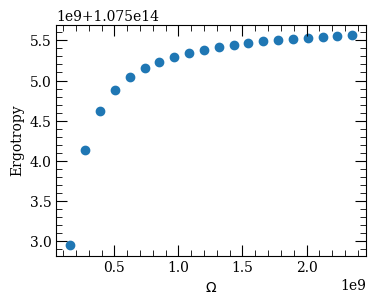

In [13]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23  
Gamma31 = atom.getTransitionRate(df.n3.values[0],df.l3.values[0],df.j3.values[0],df.n1.values[0],df.l1.values[0],df.j1.values[0],df.Te.values[0]*5778)         # Given constant (unit/s)
Gamma23 = atom.getTransitionRate(df.n2.values[0],df.l2.values[0],df.j2.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0],df.Te.values[0]*5778)       # Given constant (unit/s)
omega13 = atom.getTransitionFrequency(df.n1.values[0],df.l1.values[0],df.j1.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0])      # Angular frequency for transition 13, in Hz
omega23 = atom.getTransitionFrequency(df.n2.values[0],df.l2.values[0],df.j2.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0])      # Angular frequency for transition 23, in Hz
T13 = df.Te.values[0]*5778       # Temperature for transition 13, in K
T23 = df.Te.values[0]*5778            # Temperature for transition 23, in K

# Compute R13 and R23
R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)


Omega = np.linspace(1e8,15e8,20)/2*np.pi

sol_rho1 = np.array((Omega + R23)/(2*Omega + 3*R23))
sol_rho2 = np.array(R23/(2*Omega + 3*R23))
sol_rho3 = np.array((Omega + R23)/(2*Omega + 3*R23))
e_1 = atom.getEnergy(df.n1.values[0],df.l1.values[0],df.j1.values[0])*2.41804*10e14 #converted to Hz.
e_2 = atom.getEnergy(df.n2.values[0],df.l2.values[0],df.j2.values[0])*2.41804*10e14 #converted to Hz.
e_3 = atom.getEnergy(df.n3.values[0],df.l3.values[0],df.j3.values[0])*2.41804*10e14 #converted to Hz.
result_matrix_energy = [np.diag([e_1, e_2, e_3])]
result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
result_final_population = np.matmul(result_matrix_energy,result_matrix_pop_ss)

def sort_diagonal(matrix_list):
    sorted_matrices = []

    for matrix in matrix_list:
        # Extract diagonal elements
        diagonal = np.diagonal(matrix)

        # Sort diagonal elements in decreasing order
        sorted_diagonal = np.sort(diagonal)[::-1]

        # Replace diagonal elements with sorted values
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)

        sorted_matrices.append(sorted_matrix)

    return sorted_matrices


sorted_matrices = sort_diagonal(result_matrix_pop_ss)


sorted_result_matrix_pop_ss = [np.diag(np.sort(np.diag(matrix))) for matrix in result_matrix_pop_ss]
result_final_passive = np.matmul(result_matrix_energy,sorted_matrices)
traces_pop = [np.trace (matrix) for matrix in result_final_population]
traces_passive = [np.trace (matrix) for matrix in result_final_passive]

ergotropy = (np.array(traces_pop) - np.array(traces_passive))
plt.figure(figsize=(4,3))
plt.scatter((Omega),ergotropy)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

In [14]:
ergotropy

array([1.07502951e+14, 1.07504140e+14, 1.07504620e+14, 1.07504880e+14,
       1.07505043e+14, 1.07505154e+14, 1.07505235e+14, 1.07505297e+14,
       1.07505346e+14, 1.07505385e+14, 1.07505417e+14, 1.07505444e+14,
       1.07505468e+14, 1.07505487e+14, 1.07505505e+14, 1.07505520e+14,
       1.07505533e+14, 1.07505545e+14, 1.07505556e+14, 1.07505565e+14])

Text(0.5, 0, '$\\Omega$')

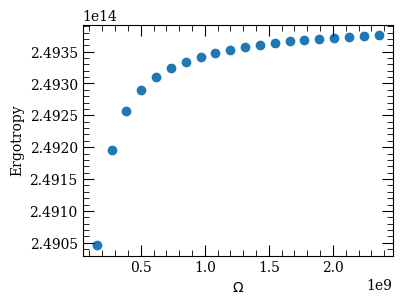

In [15]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23  
Gamma31 = atom.getTransitionRate(df.n3.values[1],df.l3.values[1],df.j3.values[1],df.n1.values[1],df.l1.values[1],df.j1.values[1],df.Te.values[1]*5778)         # Given constant (unit/s)
Gamma23 = atom.getTransitionRate(df.n2.values[1],df.l2.values[1],df.j2.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1],df.Te.values[1]*5778)       # Given constant (unit/s)
omega13 = atom.getTransitionFrequency(df.n1.values[1],df.l1.values[1],df.j1.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1])      # Angular frequency for transition 13, in Hz
omega23 = atom.getTransitionFrequency(df.n2.values[1],df.l2.values[1],df.j2.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1])      # Angular frequency for transition 23, in Hz
T13 = df.Te.values[1]*5778       # Temperature for transition 13, in K
T23 = df.Te.values[1]*5778            # Temperature for transition 23, in K

# Compute R13 and R23
R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)


Omega = np.linspace(1e8,15e8,20)/2*np.pi

sol_rho1 = np.array((Omega + R23)/(2*Omega + 3*R23))
sol_rho2 = np.array(R23/(2*Omega + 3*R23))
sol_rho3 = np.array((Omega + R23)/(2*Omega + 3*R23))
e_1 = atom.getEnergy(df.n1.values[1],df.l1.values[1],df.j1.values[1])*2.41804*10e14 #converted to Hz.
e_2 = atom.getEnergy(df.n2.values[1],df.l2.values[1],df.j2.values[1])*2.41804*10e14 #converted to Hz.
e_3 = atom.getEnergy(df.n3.values[1],df.l3.values[1],df.j3.values[1])*2.41804*10e14 #converted to Hz.
result_matrix_energy = [np.diag([e_1, e_2, e_3])]
result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
result_final_population = np.matmul(result_matrix_energy,result_matrix_pop_ss)

def sort_diagonal(matrix_list):
    sorted_matrices = []

    for matrix in matrix_list:
        # Extract diagonal elements
        diagonal = np.diagonal(matrix)

        # Sort diagonal elements in decreasing order
        sorted_diagonal = np.sort(diagonal)[::-1]

        # Replace diagonal elements with sorted values
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)

        sorted_matrices.append(sorted_matrix)

    return sorted_matrices


sorted_matrices = sort_diagonal(result_matrix_pop_ss)


sorted_result_matrix_pop_ss = [np.diag(np.sort(np.diag(matrix))) for matrix in result_matrix_pop_ss]
result_final_passive = np.matmul(result_matrix_energy,sorted_matrices)
traces_pop = [np.trace (matrix) for matrix in result_final_population]
traces_passive = [np.trace (matrix) for matrix in result_final_passive]

ergotropy2 = np.array(traces_pop) - np.array(traces_passive)
plt.figure(figsize=(4,3))
plt.scatter(Omega,ergotropy2)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

<Figure size 400x300 with 0 Axes>

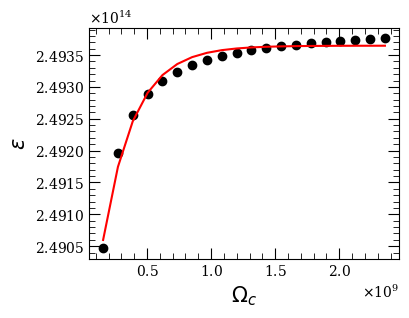

In [34]:
from scipy.optimize import curve_fit
plt.figure(figsize=(4,3))


# Define the exponential saturation model
def exp_model(Omega, a, b, c):
    return a * (1 - np.exp(-b * Omega)) + c

popt, _ = curve_fit(exp_model, Omega, ergotropy2, p0=[1e14, 1e-9, 7.694e14], maxfev=5000)
fig, ax1 = plt.subplots(figsize=(4,3))

# Plot ergotropy on the left y-axis
ax1.scatter(Omega, ergotropy2, color='k', label='$\epsilon$')
plt.plot(Omega, exp_model(Omega, *popt), 'r-', label='Exp Fit')
ax1.set_xlabel(r'$\Omega_c$',fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k',fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
# ax2 = ax1.twinx()
# ax2.scatter(Omega, ergotropy2,color='grey',marker='*', label='$\epsilon$')
# # plt.plot(Omega, exp_model(Omega, *popt), 'r-', label='Exp Fit')
# ax2.set_ylabel('$\epsilon$', color='grey',fontsize=15)
# ax2.tick_params(axis='y', labelcolor='grey')
# ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# fig.tight_layout()
plt.show()

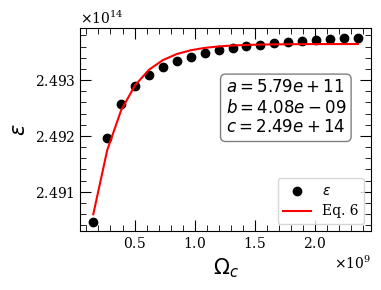

In [35]:
# Extract fitted parameters
a, b, c = popt

# Create the plot
fig, ax1 = plt.subplots(figsize=(4, 3))

# Scatter plot of data
ax1.scatter(Omega, ergotropy2, color='k', label='$\epsilon$')

# Plot the fitted model
ax1.plot(Omega, exp_model(Omega, *popt), 'r-', label='Eq. 6')

# Set labels
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Add the values of a, b, and c inside the plot in scientific notation
textstr = f"$a = {a:.2e}$\n$b = {b:.2e}$\n$c = {c:.2e}$"
ax1.text(0.50, 0.75, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Display the plot
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

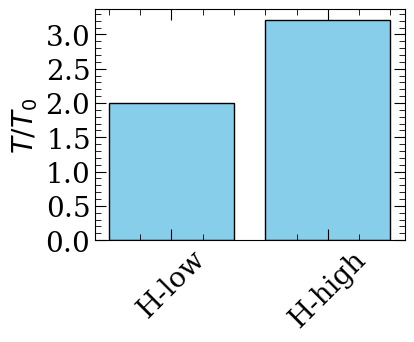

In [18]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H-low", "H-high"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, df.T0.values, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$T/T_0$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(2.00,2.23)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# List of atomic models
atoms = [Lithium6(), Lithium6()]

# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23    # Boltzmann constant, in J/K

# Initialize a list to store ergotropy results
ergotropy_results = []
erg_array = []
w13 = []
w23 = []
sol_rho_22 = []
sol_rho_33 = []
work_al_be_array = []
ent_array = []
# Loop through each atom and its corresponding index
for atom, i in zip(atoms, range(len(atoms))):
    # Extract relevant values for the current index
    Gamma31 = atom.getTransitionRate(df.n3.values[i], df.l3.values[i], df.j3.values[i], df.n1.values[i], df.l1.values[i], df.j1.values[i])
    Gamma23 = atom.getTransitionRate(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega13 = atom.getTransitionFrequency(df.n1.values[i], df.l1.values[i], df.j1.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega23 = atom.getTransitionFrequency(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    T13 = df.Te.values[i] * 5778
    T23 = df.Te.values[i] * 5778
    w13.append(omega13)
    w23.append(omega23)
    # Compute R13 and R23
    R13 = atom.getTransitionRate(df.n3.values[i], df.l3.values[i], df.j3.values[i], df.n1.values[i], df.l1.values[i], df.j1.values[i], df.Te.values[i] * 5778)
    R23 = atom.getTransitionRate(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i], df.Te.values[i] * 5778)
    Omega = df.Rfq.values[i]

    sol_rho1 = (Omega + R23) / (2 * Omega + 3 * R23)
    sol_rho2 = R23 / (2 * Omega + 3 * R23)
    sol_rho3 = (Omega + R23) / (2 * Omega + 3 * R23)
    sol_rho_22.append(sol_rho2)
    sol_rho_33.append(sol_rho3)
    e_1 = np.pi*2*hbar*atom.getEnergy(df.n1.values[i], df.l1.values[i], df.j1.values[i]) * 2.41804e14
    e_2 = np.pi*2*hbar*atom.getEnergy(df.n2.values[i], df.l2.values[i], df.j2.values[i]) * 2.41804e14
    e_3 = np.pi*2*hbar*atom.getEnergy(df.n3.values[i], df.l3.values[i], df.j3.values[i]) * 2.41804e14
    
    work_al_be = (e_3-e_2)+k_b*df.Te.values[i]*5778*np.log(np.array(sol_rho3)/np.array(sol_rho2))
    work_al_be_array.append(work_al_be)
    ent = k_b*df.Te.values[i]*5778*np.log(np.array(sol_rho3)/np.array(sol_rho2))
    ent_array.append(ent)
    result_matrix_energy = np.diag([e_1, e_2, e_3])
    result_matrix_pop_ss = np.diag([sol_rho1, sol_rho2, sol_rho3])
    result_final_population = np.matmul(result_matrix_energy, result_matrix_pop_ss)

    # Sort the diagonal of result_matrix_pop_ss
    def sort_diagonal(matrix):
        sorted_diagonal = np.sort(np.diagonal(matrix))[::-1]
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)
        return sorted_matrix

    sorted_matrix_pop_ss = sort_diagonal(result_matrix_pop_ss)
    result_final_passive = np.matmul(result_matrix_energy, sorted_matrix_pop_ss)

    # Calculate traces and ergotropy
    trace_pop = np.trace(result_final_population)
    trace_passive = np.trace(result_final_passive)
    ergotropy = trace_pop - trace_passive

    # Append results to the list
    erg_array.append(ergotropy)
    ergotropy_results.append({
        'Atom': atom.__class__.__name__,
        'Index': i,
        'Ergotropy': ergotropy
    })

# Convert the results to a DataFrame for easier handling
ergotropy_df = pd.DataFrame(ergotropy_results)
print(ergotropy_df)


       Atom  Index     Ergotropy
0  Lithium6      0  9.476948e-22
1  Lithium6      1  5.241477e-22


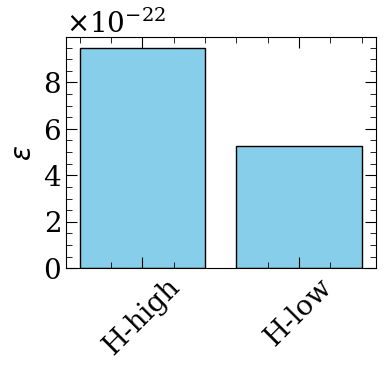

In [21]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H-high", "H-low"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, ergotropy_df.Ergotropy.values, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$\epsilon$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(2.00,2.23)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


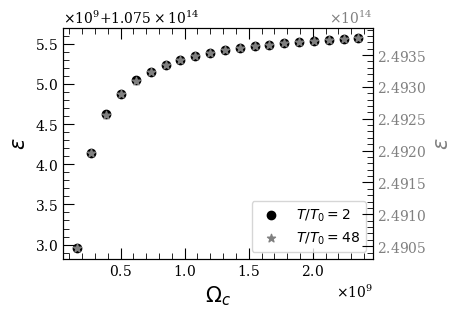

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, and ergotropy2 are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy, color='k', label='$T/T_0 = 2$')
# plot1 = ax1.plot(Omega, exp_model(Omega, *popt), 'r-', label='Fitted')
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2, color='grey', marker='*', label='$T/T_0 = 48$')

ax2.set_ylabel('$\epsilon$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add legend
scatters = [scatter1, scatter2]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.show()


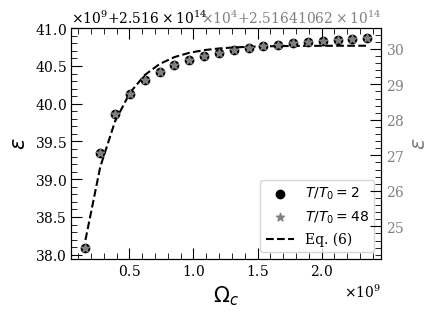

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, and ergotropy2 are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy, color='k', label='$T/T_0 = 2$')
plot1, = ax1.plot(Omega, exp_model(Omega, *popt), 'k--', label='Eq. (6)')  # Note the comma to unpack the line object
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2, color='grey', marker='*', label='$T/T_0 = 48$')

ax2.set_ylabel('$\epsilon$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add legend
scatters = [scatter1, scatter2, plot1]  # plot1 is no longer a list
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.show()


In [20]:
ergotropy

array([2.51638083e+14, 2.51639347e+14, 2.51639858e+14, 2.51640134e+14,
       2.51640308e+14, 2.51640426e+14, 2.51640513e+14, 2.51640579e+14,
       2.51640630e+14, 2.51640672e+14, 2.51640706e+14, 2.51640735e+14,
       2.51640760e+14, 2.51640781e+14, 2.51640799e+14, 2.51640815e+14,
       2.51640829e+14, 2.51640842e+14, 2.51640853e+14, 2.51640864e+14])

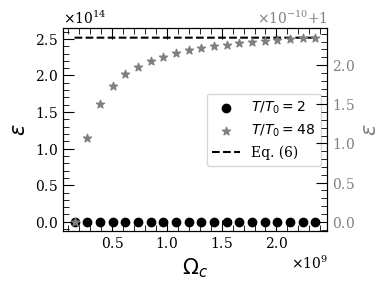

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, ergotropy2, exp_model, and popt are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy/min(ergotropy), color='k', label='$T/T_0 = 2$')
plot1, = ax1.plot(Omega, exp_model(Omega, *popt), 'k--', label='Eq. (6)')  # Note the comma to unpack the line object
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel(r'$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')

# Format the y-axis of ax1
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Format the x-axis
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2/min(ergotropy2), color='grey', marker='*', label='$T/T_0 = 48$')
ax2.set_ylabel(r'$\epsilon$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')

# Format the y-axis of ax2
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add a combined legend for both plots
scatters = [scatter1, scatter2, plot1]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='best')  # Automatically finds the best position for the legend

# Show the plot
plt.tight_layout()  # Adjusts plot to fit within the figure area
plt.show()


In [41]:
ergotropy

array([2.51638083e+14, 2.51639347e+14, 2.51639858e+14, 2.51640134e+14,
       2.51640308e+14, 2.51640426e+14, 2.51640513e+14, 2.51640579e+14,
       2.51640630e+14, 2.51640672e+14, 2.51640706e+14, 2.51640735e+14,
       2.51640760e+14, 2.51640781e+14, 2.51640799e+14, 2.51640815e+14,
       2.51640829e+14, 2.51640842e+14, 2.51640853e+14, 2.51640864e+14])

In [42]:
ergotropy2

array([2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14])

In [43]:
Omega

array([1.57079633e+08, 2.72822520e+08, 3.88565407e+08, 5.04308294e+08,
       6.20051182e+08, 7.35794069e+08, 8.51536956e+08, 9.67279843e+08,
       1.08302273e+09, 1.19876562e+09, 1.31450851e+09, 1.43025139e+09,
       1.54599428e+09, 1.66173717e+09, 1.77748005e+09, 1.89322294e+09,
       2.00896583e+09, 2.12470872e+09, 2.24045160e+09, 2.35619449e+09])

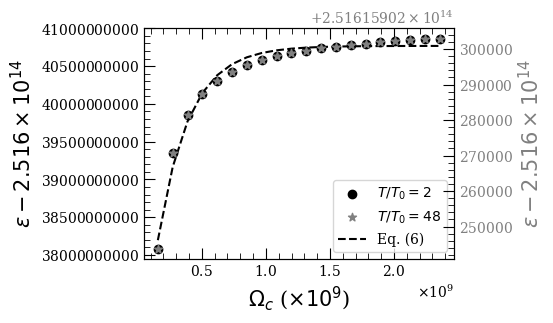

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, ergotropy2, exp_model, and popt are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Base offset for normalization
y_base = 2.516e+14
y_base2 = 2.516e+10
# Normalize y-axis values for better legibility
ergotropy_normalized = ergotropy - y_base
ergotropy2_normalized = ergotropy2 - y_base2

# Plot normalized ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy_normalized, color='k', label='$T/T_0 = 2$')
plot1, = ax1.plot(Omega, exp_model(Omega, *popt) - y_base, 'k--', label='Eq. (6)')

ax1.set_xlabel(r'$\Omega_c$ ($\times 10^9$)', fontsize=15)
ax1.set_ylabel(r'$\epsilon - 2.516 \times 10^{14}$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')

# Format the y-axis of ax1
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='plain')

# Format the x-axis
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2_normalized, color='grey', marker='*', label='$T/T_0 = 48$')
ax2.set_ylabel(r'$\epsilon - 2.516 \times 10^{14}$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')

# Format the y-axis of ax2
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='plain')

# Add a combined legend for both plots
scatters = [scatter1, scatter2, plot1]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

# Adjust layout and show plot
# plt.tight_layout()
plt.show()


In [26]:
ergotropy

array([2.51638083e+14, 2.51639347e+14, 2.51639858e+14, 2.51640134e+14,
       2.51640308e+14, 2.51640426e+14, 2.51640513e+14, 2.51640579e+14,
       2.51640630e+14, 2.51640672e+14, 2.51640706e+14, 2.51640735e+14,
       2.51640760e+14, 2.51640781e+14, 2.51640799e+14, 2.51640815e+14,
       2.51640829e+14, 2.51640842e+14, 2.51640853e+14, 2.51640864e+14])

In [27]:
ergotropy2

array([2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14,
       2.51641062e+14, 2.51641062e+14, 2.51641062e+14, 2.51641062e+14])

In [28]:
ergotropy2-ergotropy

array([2.97911992e+09, 1.71525948e+09, 1.20433357e+09, 9.27930162e+08,
       7.54717052e+08, 6.35997816e+08, 5.49551699e+08, 4.83793503e+08,
       4.32090469e+08, 3.90371454e+08, 3.55999173e+08, 3.27190029e+08,
       3.02694548e+08, 2.81611370e+08, 2.63273904e+08, 2.47178572e+08,
       2.32937845e+08, 2.20248635e+08, 2.08870486e+08, 1.98610189e+08])

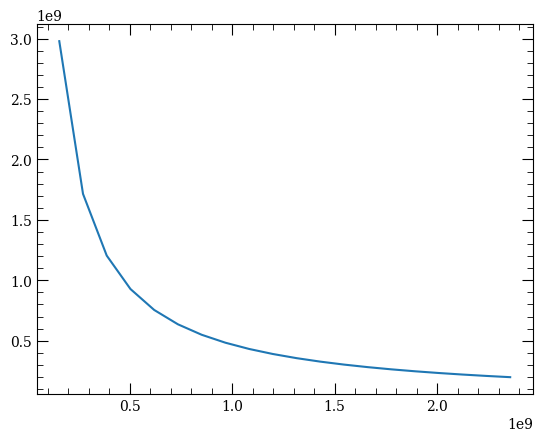

In [31]:
plt.plot(Omega,(ergotropy2-ergotropy) )

In [38]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from arc import *

# # Constants
# hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
# k_b = 1.380649e-23  

# # # Function to map atom name to ARC library class
# # def get_atom_object(atom_name):
# #     if atom_name == "Hydrogen()":
# #         return Hydrogen()
# #     elif atom_name == "Lithium6()":
# #         return Lithium6()
# #     elif atom_name == "Lithium7()":
# #         return Lithium7()
# #     elif atom_name == "Sodium()":
# #         return Sodium()
# #     elif atom_name == "Potassium39()":
# #         return Potassium39()
# #     elif atom_name == "Potassium40()":
# #         return Potassium40()
# #     elif atom_name == "Potassium41()":
# #         return Potassium41()
# #     elif atom_name == "Rubidium85()":
# #         return Rubidium85()
# #     elif atom_name == "Rubidium87()":
# #         return Rubidium87()
# #     elif atom_name == "Caesium()":
# #         return Caesium()
# #     else:
# #         raise ValueError(f"Unknown atom: {atom_name}")

# # Function to calculate ergotropy for each case in the dataframe
# def calculate_ergotropy(row):
#     n1, l1, j1 = row['n1'], row['l1'], row['j1']
#     n2, l2, j2 = row['n2'], row['l2'], row['j2']
#     n3, l3, j3 = row['n3'], row['l3'], row['j3']
#     Te = row['Te']
# #     atom = get_atom_object(row['Atom'])

#     T13 = T23 = Te

#     try:
#         Gamma31 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1, T13)
#         Gamma23 = atom.getTransitionRate(n2, l2, j2, n3, l3, j3, T23)
#         omega13 = atom.getTransitionFrequency(n1, l1, j1, n3, l3, j3)
#         omega23 = atom.getTransitionFrequency(n2, l2, j2, n3, l3, j3)
#         e_1 = atom.getEnergy(n1, l1, j1)
#         e_2 = atom.getEnergy(n2, l2, j2)
#         e_3 = atom.getEnergy(n3, l3, j3)
#     except Exception as e:
#         print(f"Error calculating transitions for {row['Atom']}: {e}")
#         return np.full(len(Omega), np.nan)

#     R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
#     R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)

#     sol_rho1 = (Omega + R23) / (2 * Omega + 3 * R23)
#     sol_rho2 = R23 / (2 * Omega + 3 * R23)
#     sol_rho3 = (Omega + R23) / (2 * Omega + 3 * R23)

#     result_matrix_energy = np.diag([e_1, e_2, e_3])
#     result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
#     result_final_population = [np.matmul(result_matrix_energy, pop_ss) for pop_ss in result_matrix_pop_ss]

#     def sort_diagonal(matrix_list):
#         sorted_matrices = []
#         for matrix in matrix_list:
#             diagonal = np.diagonal(matrix)
#             sorted_diagonal = np.sort(diagonal)[::-1]
#             sorted_matrix = np.copy(matrix)
#             np.fill_diagonal(sorted_matrix, sorted_diagonal)
#             sorted_matrices.append(sorted_matrix)
#         return sorted_matrices

#     sorted_matrices = sort_diagonal(result_matrix_pop_ss)
#     result_final_passive = [np.matmul(result_matrix_energy, sorted_matrix) for sorted_matrix in sorted_matrices]

#     traces_pop = [np.trace(matrix) for matrix in result_final_population]
#     traces_passive = [np.trace(matrix) for matrix in result_final_passive]

#     ergotropy = np.array(traces_pop) - np.array(traces_passive)
    
#     return ergotropy


# # Define Omega
# Omega = np.linspace(1e8, 15e9, 20) / (2 * np.pi)

# # Calculate ergotropy for each row in the dataframe
# ergotropy_list = df.apply(calculate_ergotropy, axis=1)
# ergotropy_df = pd.DataFrame(ergotropy_list.tolist())

# # Display the ergotropy for each case
# # print(ergotropy_df)
# plt.plot(Omega, ergotropy_df.T)
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()


In [39]:
# plt.plot(Omega, ergotropy_df.T[0])
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()

In [40]:
# plt.plot(Omega, ergotropy_df.T[5])
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()

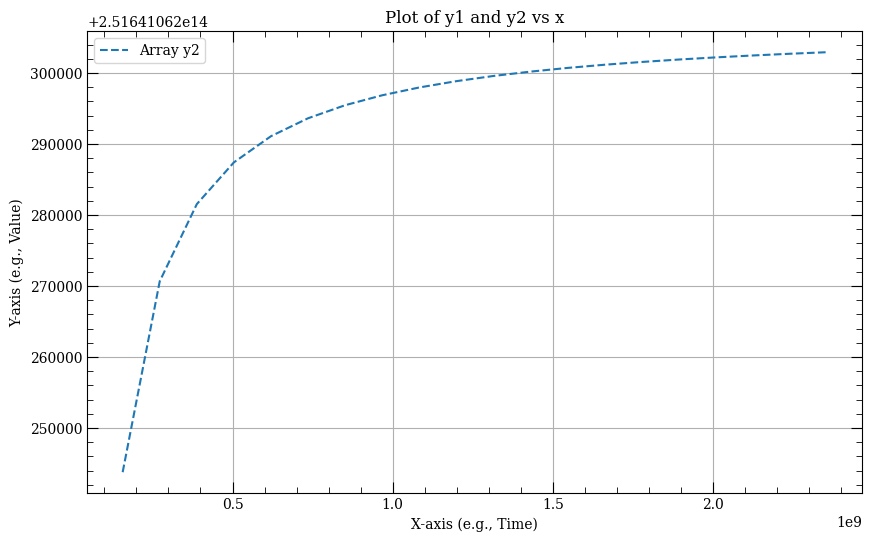

In [48]:
import matplotlib.pyplot as plt
import numpy as np


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first array
# plt.plot(Omega, ergotropy, label='Array y1', marker='o')

# Plot the second array
plt.plot(Omega, ergotropy2, label='Array y2', linestyle='--')

# Add labels, legend, and title
plt.xlabel('X-axis (e.g., Time)')
plt.ylabel('Y-axis (e.g., Value)')
plt.title('Plot of y1 and y2 vs x')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
